<a href="https://colab.research.google.com/github/rvsvhy/Machine-Learning/blob/main/Machine_Learning_Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A2 - Train metrics (MSE, RMSE, MAPE, R2): (31.396989942881742, 5.603301700148024, 0.07674795056433575, 0.042518731189019165)
A2 - Test metrics (MSE, RMSE, MAPE, R2): (34.008695036383976, 5.831697440401378, 0.07753376828939094, 0.04777690725381922)
A3 - Train metrics (all features): (0.11946763843402063, 0.3456409096649594, 0.004876756092018211, 0.9963567199837388)
A3 - Test metrics (all features): (0.11977135600955417, 0.34607998498837544, 0.004997141062233617, 0.9966464737644356)
A4 - Cluster centers: [[ 1.37156659e+01  1.25491578e+01  0.00000000e+00  2.87498843e+02
   2.09907330e+03  4.89144569e+01  1.23246428e+04  2.89677683e+02
   0.00000000e+00  1.15110567e+03  4.30815640e+03  4.69612685e+01
   8.86115111e+02  1.14404133e+03  1.06175418e+02  7.60272593e+02
   1.42722944e+02  4.13711160e+02  3.77135517e+02  7.62684343e+01
   1.16351183e+02  7.62686942e+01  3.65380426e-02  5.59446262e-02
   3.65381978e-02  5.02161858e+00  1.05391214e+01  3.05596136e+01
   1.36393093e+00  1.66003812e

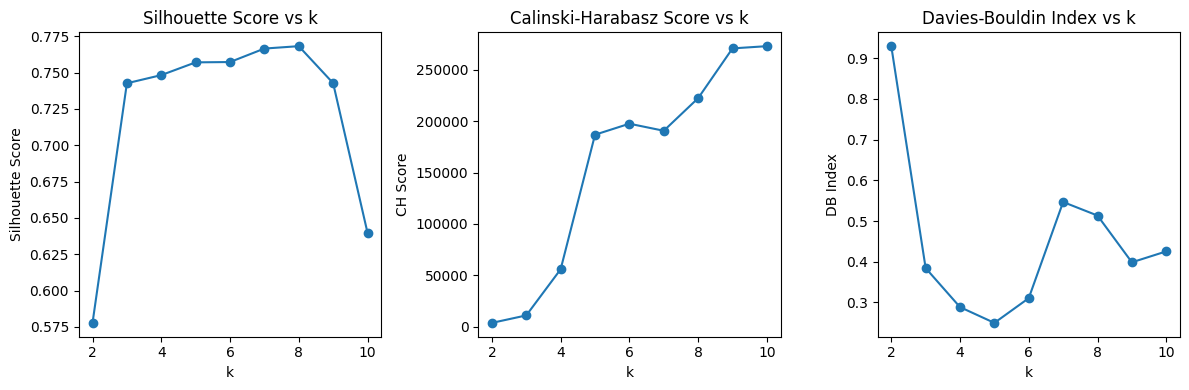

A6 - k=2: Sil=0.578, CH=3634.424, DB=0.930
A6 - k=3: Sil=0.743, CH=10922.354, DB=0.384
A6 - k=4: Sil=0.748, CH=55836.181, DB=0.288
A6 - k=5: Sil=0.757, CH=186896.785, DB=0.250


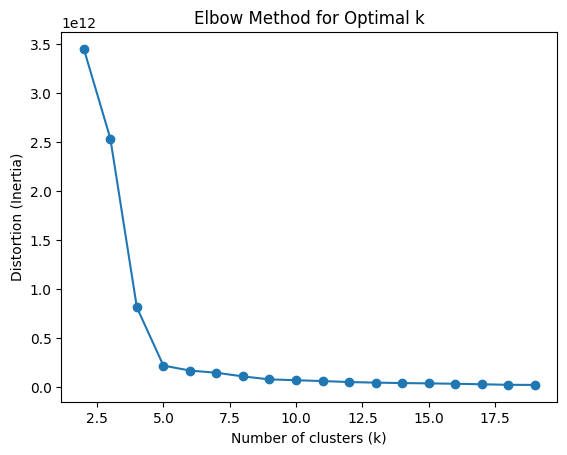

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_percentage_error,
    r2_score,
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score
)
from sklearn.model_selection import train_test_split

# -----------------------------
# Load dataset
# -----------------------------
df = pd.read_csv("/content/drive/MyDrive/Obfuscated-MalMem2022.csv")

# Drop non-numeric columns except target
numeric_df = df.select_dtypes(include=[np.number])
target_col = "pslist.nproc"  # numeric target for regression

# Features for regression (exclude target)
X_all = numeric_df.drop(columns=[target_col])
y_all = numeric_df[target_col]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

# -----------------------------
# Functions
# -----------------------------
def train_linear_regression(X_train, y_train):
    """Train Linear Regression model."""
    return LinearRegression().fit(X_train, y_train)

def evaluate_regression_model(model, X, y):
    """Return regression metrics as Python floats."""
    y_pred = model.predict(X)
    mse = float(mean_squared_error(y, y_pred))
    rmse = float(np.sqrt(mse))
    mape = float(mean_absolute_percentage_error(y, y_pred))
    r2 = float(r2_score(y, y_pred))
    return mse, rmse, mape, r2

def perform_kmeans(X, k):
    """Perform KMeans clustering."""
    return KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X)

def evaluate_clustering_model(X, labels):
    """Return clustering metrics as Python floats."""
    sil = float(silhouette_score(X, labels))
    ch = float(calinski_harabasz_score(X, labels))
    db = float(davies_bouldin_score(X, labels))
    return sil, ch, db

def clustering_scores_for_k_range(X, k_values):
    """Return clustering scores for multiple k values."""
    results = []
    for k in k_values:
        model = perform_kmeans(X, k)
        sil, ch, db = evaluate_clustering_model(X, model.labels_)
        results.append((k, sil, ch, db))
    return results

def elbow_plot(X, k_min=2, k_max=20):
    """Elbow method plot."""
    distortions = []
    for k in range(k_min, k_max):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X)
        distortions.append(float(kmeans.inertia_))
    plt.plot(range(k_min, k_max), distortions, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Distortion (Inertia)')
    plt.title('Elbow Method for Optimal k')
    plt.show()

# -----------------------------
# A1: Linear Regression with one attribute
# -----------------------------
X_train_single = X_train[["pslist.avg_threads"]]  # Example single numeric feature
X_test_single = X_test[["pslist.avg_threads"]]
model_single = train_linear_regression(X_train_single, y_train)

# -----------------------------
# A2: Metrics for single-attribute model
# -----------------------------
train_metrics_single = evaluate_regression_model(model_single, X_train_single, y_train)
test_metrics_single = evaluate_regression_model(model_single, X_test_single, y_test)
print("A2 - Train metrics (MSE, RMSE, MAPE, R2):", train_metrics_single)
print("A2 - Test metrics (MSE, RMSE, MAPE, R2):", test_metrics_single)

# -----------------------------
# A3: Multiple attributes
# -----------------------------
model_multi = train_linear_regression(X_train, y_train)
train_metrics_multi = evaluate_regression_model(model_multi, X_train, y_train)
test_metrics_multi = evaluate_regression_model(model_multi, X_test, y_test)
print("A3 - Train metrics (all features):", train_metrics_multi)
print("A3 - Test metrics (all features):", test_metrics_multi)

# -----------------------------
# A4: KMeans with k=2
# -----------------------------
X_clustering = X_train  # Already numeric and target removed
kmeans_2 = perform_kmeans(X_clustering, 2)
print("A4 - Cluster centers:", kmeans_2.cluster_centers_)

# -----------------------------
# A5: Clustering metrics for k=2
# -----------------------------
# A5 - Clustering metrics for k=2
scores_k2 = evaluate_clustering_model(X_clustering, kmeans_2.labels_)
print("A5 - Silhouette, CH, DB:", tuple(float(s) for s in scores_k2))

# A6 - Scores for k from 2 to 10
k_values = range(2, 11)
sil_scores, ch_scores, db_scores = [], [], []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_clustering)
    sil_scores.append(float(silhouette_score(X_clustering, kmeans.labels_)))
    ch_scores.append(float(calinski_harabasz_score(X_clustering, kmeans.labels_)))
    db_scores.append(float(davies_bouldin_score(X_clustering, kmeans.labels_)))

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(k_values, sil_scores, marker='o')
plt.title("Silhouette Score vs k")
plt.xlabel("k")
plt.ylabel("Silhouette Score")

plt.subplot(1, 3, 2)
plt.plot(k_values, ch_scores, marker='o')
plt.title("Calinski-Harabasz Score vs k")
plt.xlabel("k")
plt.ylabel("CH Score")

plt.subplot(1, 3, 3)
plt.plot(k_values, db_scores, marker='o')
plt.title("Davies-Bouldin Index vs k")
plt.xlabel("k")
plt.ylabel("DB Index")

plt.tight_layout()
plt.show()


# -----------------------------
# A6: Scores for different k values
# -----------------------------
k_values = range(2, 6)
clustering_results = clustering_scores_for_k_range(X_clustering, k_values)
for k, sil, ch, db in clustering_results:
    print(f"A6 - k={k}: Sil={sil:.3f}, CH={ch:.3f}, DB={db:.3f}")

# -----------------------------
# A7: Elbow plot
# -----------------------------
elbow_plot(X_clustering)
